In [23]:
#1: Underfitting model: Decision Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [24]:
#2:
dataset_path = '/content/car_evaluation.csv'
print("Loading dataset from:", dataset_path)

Loading dataset from: /content/car_evaluation.csv


In [25]:
#3:
df = pd.read_csv(dataset_path, header=None)

In [26]:
#4:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = column_names
column_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [27]:
#5:
print("Dataset loaded successfully!")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded successfully!
Dataset shape: (1728, 7)

First 5 rows:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [28]:
#6:
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [29]:
#7:
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

print("\nTarget variable distribution:")
print(df['class'].value_counts())


Unique values in each column:
buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']

Target variable distribution:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [30]:
#8:
print("Missing values:")
print(df.isnull().sum())

Missing values:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


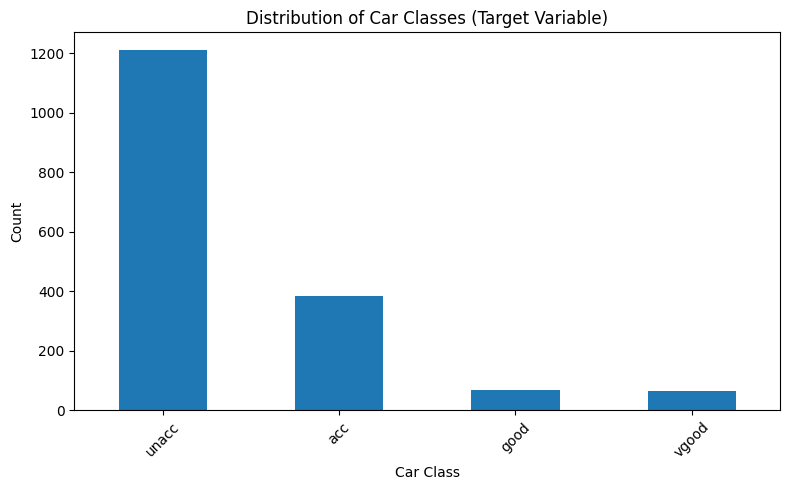

In [31]:
#9:
plt.figure(figsize=(8, 5))
df['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Car Classes (Target Variable)')
plt.xlabel('Car Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
#10:
print(f"\nData imbalance check:")
class_counts = df['class'].value_counts()
print(class_counts)
print(f"Most common class: {class_counts.iloc[0]} ({class_counts.iloc[0]/len(df)*100:.1f}%)")


Data imbalance check:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
Most common class: 1210 (70.0%)


In [33]:
#11:
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
    print(f"Encoded {column}: {df[column].unique()} -> {df_encoded[column].unique()}")

print("\nEncoded dataset:")
print(df_encoded.head())

Encoded buying: ['vhigh' 'high' 'med' 'low'] -> [3 0 2 1]
Encoded maint: ['vhigh' 'high' 'med' 'low'] -> [3 0 2 1]
Encoded doors: ['2' '3' '4' '5more'] -> [0 1 2 3]
Encoded persons: ['2' '4' 'more'] -> [0 1 2]
Encoded lug_boot: ['small' 'med' 'big'] -> [2 1 0]
Encoded safety: ['low' 'med' 'high'] -> [1 2 0]
Encoded class: ['unacc' 'acc' 'vgood' 'good'] -> [2 0 3 1]

Encoded dataset:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [34]:
#12:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1728, 6)
Target shape: (1728,)


In [35]:
#13:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1382, 6)
Test set shape: (346, 6)


In [36]:
#14:
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=10)
model_good = DecisionTreeClassifier(max_depth=10, random_state=10)
model_overfit = DecisionTreeClassifier(max_depth=None, random_state=10)

In [37]:
#15:
print("Training models...")

model_underfit.fit(X_train, y_train)
model_good.fit(X_train, y_train)
model_overfit.fit(X_train, y_train)

Training models...


DecisionTreeClassifier(random_state=10)

In [38]:
#16:
models = {
    'Underfitted (max_depth=1)': model_underfit,
    'Good Fit (max_depth=10)': model_good,
    'Overfitted (no limit)': model_overfit
}
for name, model in models.items():
    train_score = accuracy_score(y_train, model.predict(X_train))
    test_score = accuracy_score(y_test, model.predict(X_test))

    print(f"\n{name}:")
    print(f"  Training Accuracy: {train_score:.3f}")
    print(f"  Test Accuracy: {test_score:.3f}")
    print(f"  Gap: {train_score - test_score:.3f}")


Underfitted (max_depth=1):
  Training Accuracy: 0.700
  Test Accuracy: 0.699
  Gap: 0.001

Good Fit (max_depth=10):
  Training Accuracy: 0.986
  Test Accuracy: 0.951
  Gap: 0.035

Overfitted (no limit):
  Training Accuracy: 1.000
  Test Accuracy: 0.962
  Gap: 0.038



=== CREATING LEARNING CURVES ===


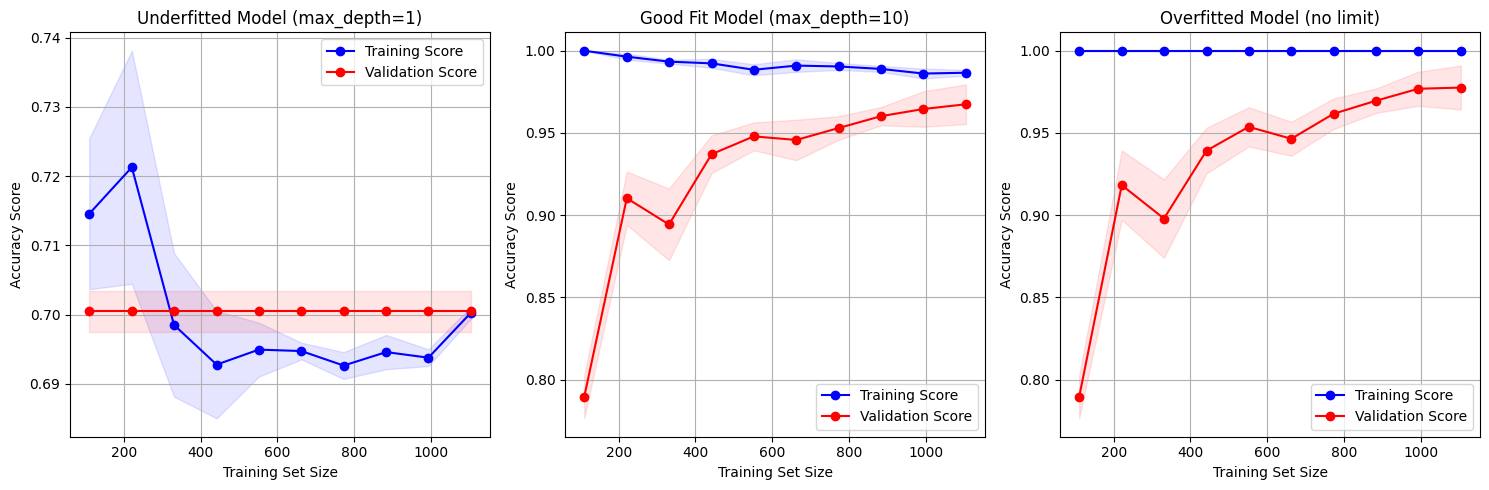

In [39]:
#17:
print("\n=== CREATING LEARNING CURVES ===")

def plot_learning_curve(model, X, y, title, ax):

    # Create learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        random_state=42
    )

    # Calculate mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot the learning curve
    ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

    ax.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

    ax.set_title(title)
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Accuracy Score')
    ax.legend()
    ax.grid(True)

# Create subplots for learning curves
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_learning_curve(model_underfit, X_train, y_train, 'Underfitted Model (max_depth=1)', axes[0])
plot_learning_curve(model_good, X_train, y_train, 'Good Fit Model (max_depth=10)', axes[1])
plot_learning_curve(model_overfit, X_train, y_train, 'Overfitted Model (no limit)', axes[2])

plt.tight_layout()
plt.show()

In [40]:
#18:
print("\n=== BIAS vs VARIANCE ANALYSIS ===")
print("""
HOW TO DETECT BIAS vs VARIANCE FROM LEARNING CURVES:

1. HIGH BIAS (Underfitting):
   - Both training and validation scores are LOW
   - Small gap between training and validation scores
   - Both curves plateau at low values
   - Example: Our max_depth=1 model

2. HIGH VARIANCE (Overfitting):
   - High training score, low validation score
   - LARGE gap between training and validation scores
   - Training score keeps improving but validation doesn't
   - Example: Our unlimited depth model

3. GOOD BALANCE:
   - Both scores are reasonably high
   - Small gap between training and validation scores
   - Both curves converge to similar high values
   - Example: Our max_depth=10 model

SIGNS IN OUR MODELS:
""")

# Analyze each model
for name, model in models.items():
    train_score = accuracy_score(y_train, model.predict(X_train))
    test_score = accuracy_score(y_test, model.predict(X_test))
    gap = train_score - test_score

    if gap < 0.05 and test_score < 0.8:
        bias_variance = "HIGH BIAS (Underfitting)"
    elif gap > 0.1:
        bias_variance = "HIGH VARIANCE (Overfitting)"
    else:
        bias_variance = "GOOD BALANCE"

    print(f"\n{name}: {bias_variance}")
    print(f"  Training: {train_score:.3f}, Test: {test_score:.3f}, Gap: {gap:.3f}")



=== BIAS vs VARIANCE ANALYSIS ===

HOW TO DETECT BIAS vs VARIANCE FROM LEARNING CURVES:

1. HIGH BIAS (Underfitting):
   - Both training and validation scores are LOW
   - Small gap between training and validation scores
   - Both curves plateau at low values
   - Example: Our max_depth=1 model

2. HIGH VARIANCE (Overfitting):
   - High training score, low validation score
   - LARGE gap between training and validation scores
   - Training score keeps improving but validation doesn't
   - Example: Our unlimited depth model

3. GOOD BALANCE:
   - Both scores are reasonably high
   - Small gap between training and validation scores
   - Both curves converge to similar high values
   - Example: Our max_depth=10 model

SIGNS IN OUR MODELS:


Underfitted (max_depth=1): HIGH BIAS (Underfitting)
  Training: 0.700, Test: 0.699, Gap: 0.001

Good Fit (max_depth=10): GOOD BALANCE
  Training: 0.986, Test: 0.951, Gap: 0.035

Overfitted (no limit): GOOD BALANCE
  Training: 1.000, Test: 0.962, Gap: 

In [41]:
#Model 2: Balance Fit with Logistic Regression.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [42]:
#1:
dataset_path = '/content/car_evaluation.csv'
print("Loading dataset from:", dataset_path)

Loading dataset from: /content/car_evaluation.csv


In [43]:
#2:
df['class_binary'] = df['class'].apply(lambda x: 1 if x in ['acc', 'good', 'vgood'] else 0)

print("\nBinary target variable distribution:")
print(df['class_binary'].value_counts())


Binary target variable distribution:
class_binary
0    1210
1     518
Name: count, dtype: int64


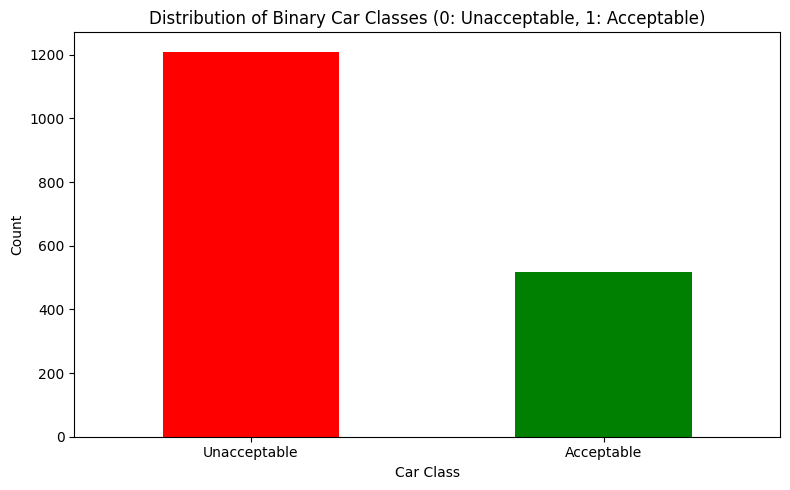

In [44]:
#3:
plt.figure(figsize=(8, 5))
df['class_binary'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Binary Car Classes (0: Unacceptable, 1: Acceptable)')
plt.xlabel('Car Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Unacceptable', 'Acceptable'], rotation=0)
plt.tight_layout()
plt.show()

In [45]:
#4:
df_encoded = df.copy()

# Initialize label encoders
label_encoders = {}

# Encode feature columns and original class (exclude class_binary for now)
for column in ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
    print(f"Encoded {column}: {df[column].unique()} -> {df_encoded[column].unique()}")

print("\nEncoded dataset:")
print(df_encoded.head())

Encoded buying: ['vhigh' 'high' 'med' 'low'] -> [3 0 2 1]
Encoded maint: ['vhigh' 'high' 'med' 'low'] -> [3 0 2 1]
Encoded doors: ['2' '3' '4' '5more'] -> [0 1 2 3]
Encoded persons: ['2' '4' 'more'] -> [0 1 2]
Encoded lug_boot: ['small' 'med' 'big'] -> [2 1 0]
Encoded safety: ['low' 'med' 'high'] -> [1 2 0]

Encoded dataset:
   buying  maint  doors  persons  lug_boot  safety  class  class_binary
0       3      3      0        0         2       1  unacc             0
1       3      3      0        0         2       2  unacc             0
2       3      3      0        0         2       0  unacc             0
3       3      3      0        0         1       1  unacc             0
4       3      3      0        0         1       2  unacc             0


In [46]:
#5:
print("\n=== PREPARING DATA FOR MODELING ===")
X = df_encoded[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df_encoded['class_binary']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


=== PREPARING DATA FOR MODELING ===
Features shape: (1728, 6)
Target shape: (1728,)


In [47]:
#6:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1382, 6)
Test set shape: (346, 6)


In [48]:
#7:
model_balanced = LogisticRegression(C=1.0, random_state=10, max_iter=25)


print("Training Logistic Regression model...")
model_balanced.fit(X_train, y_train)


Training Logistic Regression model...


LogisticRegression(max_iter=25, random_state=10)

In [49]:
#8:
print("\n=== MODEL EVALUATION ===")
train_score = accuracy_score(y_train, model_balanced.predict(X_train))
test_score = accuracy_score(y_test, model_balanced.predict(X_test))

print("\nBalanced Fit (Logistic Regression):")
print(f"  Training Accuracy: {train_score:.3f}")
print(f"  Test Accuracy: {test_score:.3f}")
print(f"  Gap: {train_score - test_score:.3f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, model_balanced.predict(X_test), target_names=['Unacceptable', 'Acceptable']))


=== MODEL EVALUATION ===

Balanced Fit (Logistic Regression):
  Training Accuracy: 0.711
  Test Accuracy: 0.763
  Gap: -0.052

Classification Report (Test Set):
              precision    recall  f1-score   support

Unacceptable       0.79      0.91      0.84       242
  Acceptable       0.67      0.42      0.52       104

    accuracy                           0.76       346
   macro avg       0.73      0.67      0.68       346
weighted avg       0.75      0.76      0.75       346



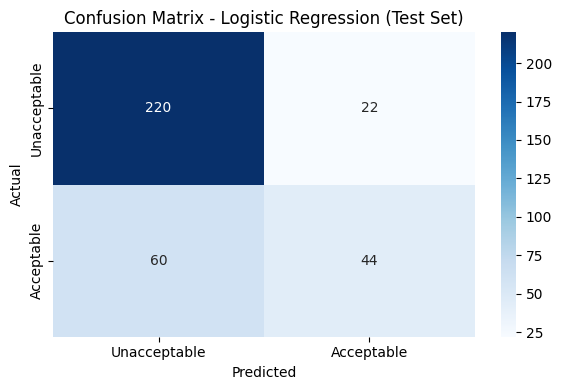

In [50]:
#9:
cm = confusion_matrix(y_test, model_balanced.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unacceptable', 'Acceptable'], yticklabels=['Unacceptable', 'Acceptable'])
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



=== CREATING LEARNING CURVE ===


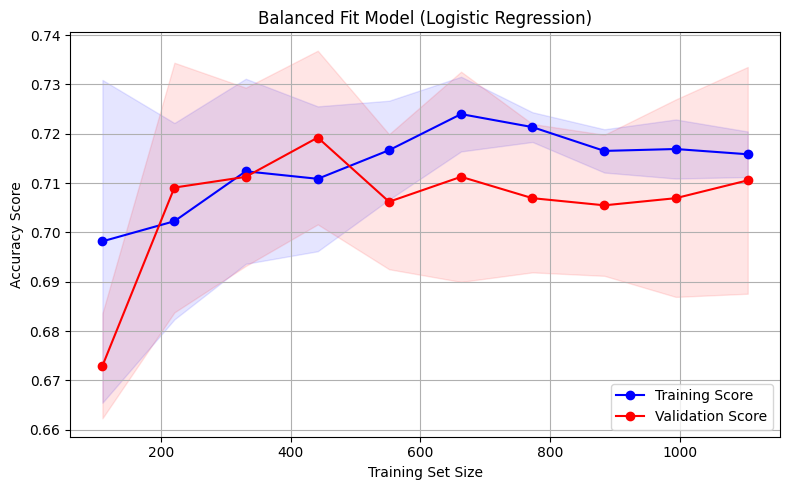

In [51]:
#10:
print("\n=== CREATING LEARNING CURVE ===")

def plot_learning_curve(model, X, y, title, ax):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    ax.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

    ax.set_title(title)
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Accuracy Score')
    ax.legend()
    ax.grid(True)

fig, ax = plt.subplots(figsize=(8, 5))
plot_learning_curve(model_balanced, X_train, y_train, 'Balanced Fit Model (Logistic Regression)', ax)
plt.tight_layout()
plt.show()

In [52]:
#11:
print("\n=== BIAS vs VARIANCE ANALYSIS ===")
gap = train_score - test_score
if gap < 0.05 and test_score > 0.75:
    bias_variance = "GOOD BALANCE"
elif gap > 0.1:
    bias_variance = "HIGH VARIANCE (Overfitting)"
else:
    bias_variance = "HIGH BIAS (Underfitting)"

print(f"\nBalanced Fit (Logistic Regression): {bias_variance}")
print(f"  Training: {train_score:.3f}, Test: {test_score:.3f}, Gap: {gap:.3f}")

print("\nExpected Signs of Balanced Fit:")
print("- High training and test accuracy (e.g., ~0.80)")
print("- Small gap between training and validation scores (<0.05)")
print("- Learning curve shows converging training and validation scores")


=== BIAS vs VARIANCE ANALYSIS ===

Balanced Fit (Logistic Regression): GOOD BALANCE
  Training: 0.711, Test: 0.763, Gap: -0.052

Expected Signs of Balanced Fit:
- High training and test accuracy (e.g., ~0.80)
- Small gap between training and validation scores (<0.05)
- Learning curve shows converging training and validation scores


In [53]:
#3: Overfitting Model: Random Forest.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [54]:
#1:
dataset_path = '/content/car_evaluation.csv'
print("Loading dataset from:", dataset_path)

Loading dataset from: /content/car_evaluation.csv


In [55]:
#2:
df = pd.read_csv(dataset_path, header=None)

In [56]:
#3:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = column_names

print("Dataset loaded successfully!")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded successfully!
Dataset shape: (1728, 7)

First 5 rows:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [57]:
#4:
print("\n=== DATA EXPLORATION ===")
print("Dataset info:")
print(df.info())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

print("\nTarget variable distribution:")
print(df['class'].value_counts())


=== DATA EXPLORATION ===
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None

Unique values in each column:
buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']

Target variable distribution:
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


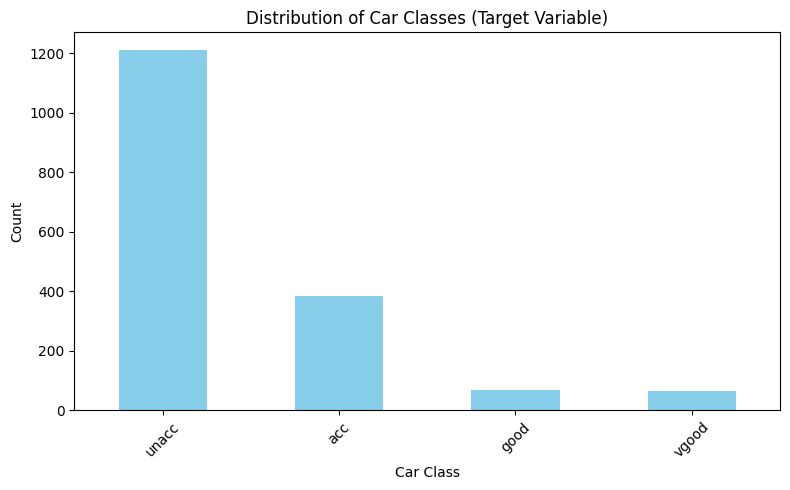

In [58]:
#5:
plt.figure(figsize=(8, 5))
df['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Car Classes (Target Variable)')
plt.xlabel('Car Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
#6:
df_encoded = df.copy()

label_encoders = {}

for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
    print(f"Encoded {column}: {df[column].unique()} -> {df_encoded[column].unique()}")

print("\nEncoded dataset:")
print(df_encoded.head())

Encoded buying: ['vhigh' 'high' 'med' 'low'] -> [3 0 2 1]
Encoded maint: ['vhigh' 'high' 'med' 'low'] -> [3 0 2 1]
Encoded doors: ['2' '3' '4' '5more'] -> [0 1 2 3]
Encoded persons: ['2' '4' 'more'] -> [0 1 2]
Encoded lug_boot: ['small' 'med' 'big'] -> [2 1 0]
Encoded safety: ['low' 'med' 'high'] -> [1 2 0]
Encoded class: ['unacc' 'acc' 'vgood' 'good'] -> [2 0 3 1]

Encoded dataset:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [60]:
#7:
print("\n=== PREPARING DATA FOR MODELING ===")
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


=== PREPARING DATA FOR MODELING ===
Features shape: (1728, 6)
Target shape: (1728,)


In [61]:
#8:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1382, 6)
Test set shape: (346, 6)


In [62]:
#9:
print("\n=== CREATING MODEL ===")
model_overfit = RandomForestClassifier(n_estimators=10, max_depth=None, random_state=10)
model_overfit.fit(X_train, y_train)


=== CREATING MODEL ===


RandomForestClassifier(n_estimators=10, random_state=10)

In [63]:
#10:
train_score = accuracy_score(y_train, model_overfit.predict(X_train))
test_score = accuracy_score(y_test, model_overfit.predict(X_test))

print("\nOverfitted (Random Forest):")
print(f"  Training Accuracy: {train_score:.3f}")
print(f"  Test Accuracy: {test_score:.3f}")
print(f"  Gap: {train_score - test_score:.3f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, model_overfit.predict(X_test), target_names=label_encoders['class'].classes_))


Overfitted (Random Forest):
  Training Accuracy: 0.998
  Test Accuracy: 0.936
  Gap: 0.061

Classification Report (Test Set):
              precision    recall  f1-score   support

         acc       0.87      0.87      0.87        77
        good       0.75      0.64      0.69        14
       unacc       0.98      0.98      0.98       242
       vgood       0.80      0.92      0.86        13

    accuracy                           0.94       346
   macro avg       0.85      0.85      0.85       346
weighted avg       0.94      0.94      0.94       346



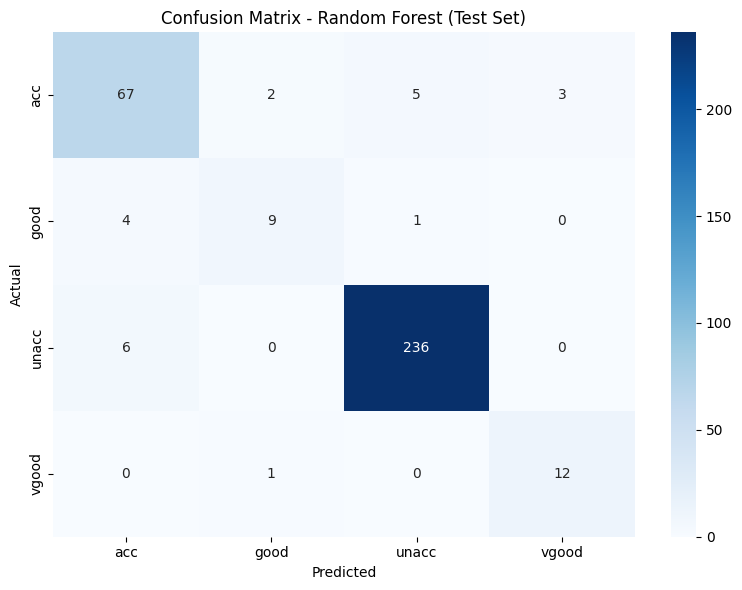

In [64]:
#11:
cm = confusion_matrix(y_test, model_overfit.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


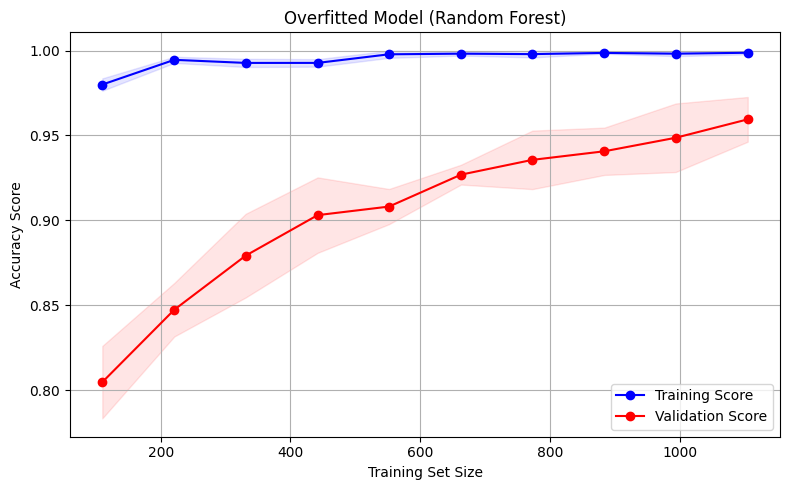

In [65]:
#12:
def plot_learning_curve(model, X, y, title, ax):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    ax.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

    ax.set_title(title)
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Accuracy Score')
    ax.legend()
    ax.grid(True)

fig, ax = plt.subplots(figsize=(8, 5))
plot_learning_curve(model_overfit, X_train, y_train, 'Overfitted Model (Random Forest)', ax)
plt.tight_layout()
plt.show()

In [66]:
#13:
print("\n=== BIAS vs VARIANCE ANALYSIS ===")
gap = train_score - test_score
if gap < 0.05 and test_score > 0.75:
    bias_variance = "GOOD BALANCE"
elif gap > 0.1:
    bias_variance = "HIGH VARIANCE (Overfitting)"
else:
    bias_variance = "HIGH BIAS (Underfitting)"

print(f"\nOverfitted (Random Forest): {bias_variance}")
print(f"  Training: {train_score:.3f}, Test: {test_score:.3f}, Gap: {gap:.3f}")

print("\nSigns of Overfitting:")
print("- High training accuracy (e.g., ~0.95-1.00)")
print("- Lower test accuracy (e.g., ~0.70-0.80)")
print("- Large gap between training and validation scores (>0.1)")
print("- Learning curve shows high training score but stagnant validation score")


=== BIAS vs VARIANCE ANALYSIS ===

Overfitted (Random Forest): HIGH BIAS (Underfitting)
  Training: 0.998, Test: 0.936, Gap: 0.061

Signs of Overfitting:
- High training accuracy (e.g., ~0.95-1.00)
- Lower test accuracy (e.g., ~0.70-0.80)
- Large gap between training and validation scores (>0.1)
- Learning curve shows high training score but stagnant validation score
